In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [2]:
import networkx as nx
from graph2plan.fourtp.faces import get_external_face
from graph2plan.fourtp.tests import test_four_complete, test_co, test_rel
from graph2plan.fourtp.faces import get_embedding_of_four_complete_G

from graph2plan.fourtp.rel import initialize_rel_graph, find_rel_edges



from graph2plan.dcel.interfaces import EdgeList


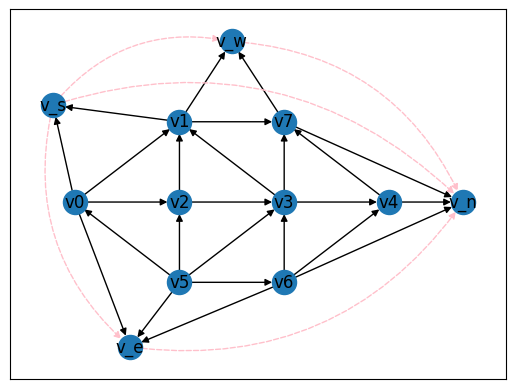

In [3]:
G, pos, full_pos =  test_four_complete()

In [4]:
G_c, co = test_co()

-----Initialization complete---
3 12
>>Biconnection check: Skipping, < 3 vertices in Gk-1, currently have ['v_e', 'v_s']...
incrementing k from 3 to 4
Multiple potential: ['v5', 'v1']. Choosing v5
incrementing k from 4 to 5
Multiple potential: ['v2', 'v6', 'v1']. Choosing v2
incrementing k from 5 to 6
Multiple potential: ['v3', 'v6', 'v1']. Choosing v3
incrementing k from 6 to 7
Multiple potential: ['v6', 'v1']. Choosing v6
incrementing k from 7 to 8
Multiple potential: ['v4', 'v1']. Choosing v4
incrementing k from 8 to 9
incrementing k from 9 to 10
Multiple potential: ['v7', 'v_w']. Choosing v7
incrementing k from 10 to 11
Time to order the last node..


In [5]:
test_co.cache_info()

CacheInfo(hits=0, misses=1, maxsize=128, currsize=1)

In [7]:
g = test_rel()


In [8]:
g.nodes["v1"]

{'data': RELVertexData(left_edge='v7', right_edge='v_w', basis_edge='v_s', left_point='v_s', right_point='v3')}

In [12]:
from pprint import pprint

In [14]:
pprint(g.nodes(data=True))

NodeDataView({'v5': {'data': RELVertexData(left_edge='v2', right_edge='v6', basis_edge='v_e', left_point='', right_point='')}, 'v0': {'data': RELVertexData(left_edge='v5', right_edge='v1', basis_edge='v_s', left_point='', right_point='')}, 'v2': {'data': RELVertexData(left_edge='v3', right_edge='v1', basis_edge='v0', left_point='', right_point='')}, 'v3': {'data': RELVertexData(left_edge='v6', right_edge='v7', basis_edge='v5', left_point='', right_point='')}, 'v6': {'data': RELVertexData(left_edge='v4', right_edge='v_n', basis_edge='v_e', left_point='v3', right_point='v_e')}, 'v4': {'data': RELVertexData(left_edge='v7', right_edge='v_n', basis_edge='v3', left_point='', right_point='')}, 'v1': {'data': RELVertexData(left_edge='v7', right_edge='v_w', basis_edge='v_s', left_point='v_s', right_point='v3')}, 'v7': {'data': RELVertexData(left_edge='v_w', right_edge='v_n', basis_edge='v3', left_point='v1', right_point='v4')}, 'v_n': {'data': RELVertexData(left_edge='', right_edge='', basis_ed

In [22]:
cw_nbs = [11, 9, 7, 5]
overlap = [11,7,5,9]

In [23]:
[x for _, x in sorted(zip(cw_nbs, overlap), key=lambda pair: pair[0])]


[9, 5, 7, 11]

In [25]:
[i for i in zip(cw_nbs, overlap)]

[(11, 11), (9, 7), (7, 5), (5, 9)]

In [27]:
[i for i in sorted(zip(cw_nbs, overlap), key=lambda pair: pair[0], reverse=True)]

[(11, 11), (9, 7), (7, 5), (5, 9)]